Visualize the confusion matrix for the classification task in Assignment 3 (the bill_authentication.csv) using Decision Tree, Logistic Regression, SVM and Neural Network

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn import tree, svm, metrics
from sklearn.linear_model import LogisticRegression
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.preprocessing import MinMaxScaler

In [2]:
data = pd.read_csv("bill_authentication.csv")
data.head() # visualize data

,Variance,Skewness,Curtosis,Entropy,Class
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


In [3]:
COLUMNS = data.columns
data.isnull().sum() # check for nulls

Variance    0
Skewness    0
Curtosis    0
Entropy     0
Class       0
dtype: int64

In [4]:
# split target column from rest of data
y = data.Class # target
X = data.drop(columns=['Class']) # X dataframe

In [5]:
scaler = MinMaxScaler()
scaler.fit(X)
X_nn = scaler.transform(X)

In [6]:
# split data into train and testing sets with 20% for testing and a randomizer state
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_nn_train, X_nn_test, y_nn_train, y_nn_test = train_test_split(X_nn, y, test_size=0.2, random_state=42)

In [7]:
decision_tree_classifier = tree.DecisionTreeClassifier() # initialize tree as decision tree classifier
decision_tree_classifier.fit(X_train, y_train) # train decision tree classifier

DecisionTreeClassifier()

In [8]:
logistic_regression = LogisticRegression() # initialize logistic regression
logistic_regression.fit(X_train, y_train) # train logistic regression model with same training data

LogisticRegression()

In [9]:
support_vector_machine = svm.SVC() # initialize support vector machine
support_vector_machine.fit(X_train, y_train) # train svm with training data

SVC()

In [10]:
model = Sequential()
model.add(Dense(12, input_dim=4, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(5, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [11]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 12)                60        
                                                                 
 dense_1 (Dense)             (None, 10)                130       
                                                                 
 dense_2 (Dense)             (None, 8)                 88        
                                                                 
 dense_3 (Dense)             (None, 5)                 45        
                                                                 
 dense_4 (Dense)             (None, 1)                 6         
                                                                 
Total params: 329
Trainable params: 329
Non-trainable params: 0
_________________________________________________________________


In [13]:
history = model.fit(X_nn_train, y_nn_train, epochs=50, batch_size=10)

Epoch 1/50
110/110 [==============================] - 1s 3ms/step - loss: 0.6682 - accuracy: 0.5597
Epoch 2/50
110/110 [==============================] - 0s 3ms/step - loss: 0.6240 - accuracy: 0.6180
Epoch 3/50
110/110 [==============================] - 0s 3ms/step - loss: 0.4862 - accuracy: 0.8268
Epoch 4/50
110/110 [==============================] - 0s 3ms/step - loss: 0.3486 - accuracy: 0.8924
Epoch 5/50
110/110 [==============================] - 0s 3ms/step - loss: 0.2510 - accuracy: 0.9280
Epoch 6/50
110/110 [==============================] - 0s 2ms/step - loss: 0.1853 - accuracy: 0.9517
Epoch 7/50
110/110 [==============================] - 0s 2ms/step - loss: 0.1462 - accuracy: 0.9599
Epoch 8/50
110/110 [==============================] - 0s 2ms/step - loss: 0.1139 - accuracy: 0.9717
Epoch 9/50
110/110 [==============================] - 0s 2ms/step - loss: 0.0906 - accuracy: 0.9781
Epoch 10/50
110/110 [==============================] - 0s 2ms/step - loss: 0.0746 - accuracy: 0.9854

In [14]:
# use same test data for predictions to compare results
svm_prediction = support_vector_machine.predict(X_test)
logistic_regression_prediction = logistic_regression.predict(X_test)
decision_tree_prediction = decision_tree_classifier.predict(X_test)
nn_prediction = model.predict_classes(X_nn_test)
# nn_prediction = np.argmax(model.predict(X_nn_test), axis=-1)

AttributeError: 'Sequential' object has no attribute 'predict_classes'

In [ ]:
# calculate percent accuracy for all models
svm_accuracy = np.sum(svm_prediction==y_test)/len(y_test)
logistic_regression_accuracy = np.sum(logistic_regression_prediction==y_test)/len(y_test)
decision_tree_accuracy = np.sum(decision_tree_prediction==y_test)/len(y_test) # get accuracy

In [ ]:
print('Neural Network Accuracy')
model.evaluate(X_nn_test, y_nn_test)[1]

Neural Network Accuracy
9/9 [==============================] - 0s 1ms/step - loss: 0.0013 - accuracy: 1.0000


1.0

In [ ]:
print('Decision Tree Accuracy')
decision_tree_accuracy*100

Decision Tree Accuracy


97.81818181818181

In [ ]:
print('Logistic Regression Accuracy')
logistic_regression_accuracy*100

Logistic Regression Accuracy


98.54545454545455

In [ ]:
print('SVM Accuracy')
svm_accuracy*100

SVM Accuracy


100.0

In [ ]:
# visualize confusion matrices
svm_cnf_matrix = metrics.confusion_matrix(y_test, svm_prediction)
logistic_regression_cnf_matrix = metrics.confusion_matrix(y_test, logistic_regression_prediction)
decision_tree_cnf_matrix = metrics.confusion_matrix(y_test, decision_tree_prediction)
nn_cnf_matrix = metrics.confusion_matrix(y_nn_test, nn_prediction)

Text(0.5, 257.44, 'Predicted label')

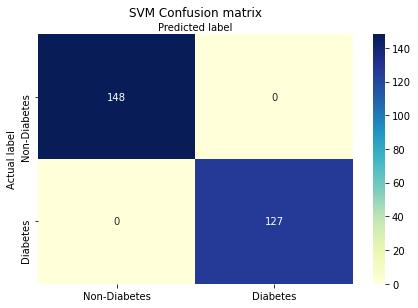

In [ ]:
class_names=['Non-Diabetes','Diabetes'] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))

# create heatmap
sns.heatmap(svm_cnf_matrix, annot=True, cmap="YlGnBu" ,fmt='d', xticklabels=class_names, yticklabels=class_names)
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('SVM Confusion matrix')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

Text(0.5, 257.44, 'Predicted label')

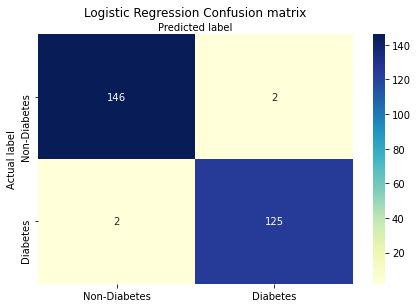

In [ ]:
class_names=['Non-Diabetes','Diabetes'] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))

# create heatmap
sns.heatmap(logistic_regression_cnf_matrix, annot=True, cmap="YlGnBu" ,fmt='d', xticklabels=class_names, yticklabels=class_names)
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Logistic Regression Confusion matrix')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

Text(0.5, 257.44, 'Predicted label')

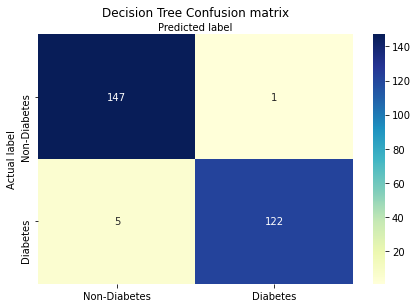

In [ ]:
class_names=['Non-Diabetes','Diabetes'] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))

# create heatmap
sns.heatmap(decision_tree_cnf_matrix, annot=True, cmap="YlGnBu" ,fmt='d', xticklabels=class_names, yticklabels=class_names)
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Decision Tree Confusion matrix')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

Text(0.5, 257.44, 'Predicted label')

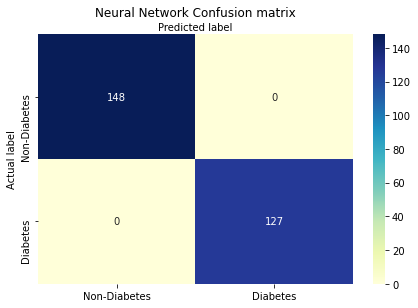

In [ ]:
class_names=['Non-Diabetes','Diabetes'] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))

# create heatmap
sns.heatmap(nn_cnf_matrix, annot=True, cmap="YlGnBu" ,fmt='d', xticklabels=class_names, yticklabels=class_names)
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Neural Network Confusion matrix')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')